Step 1: Define the Phone class

In [34]:
class Phone:
    def __init__(self, date, model, company, type, rating, price, battery_health):
        self.date = date
        self.model = model
        self.company = company
        self.type = type
        self.rating = rating
        self.price = price
        self.battery_health = battery_health
        self.unique_id = id(self)  # Assign the memory id as the unique identifier

    def __str__(self):
        # Return the formatted string with all the attributes
        return f"{self.unique_id},{self.date},{self.model},{self.company},{self.type},{self.rating},{self.price},{self.battery_health}"


Step 2: Define ApplePhone and AndroidPhone subclasses

In [35]:
class ApplePhone(Phone):
    def __init__(self, date, model, company, rating, price, battery_health):
        # Set the type to "iPhone" and call the parent class constructor
        super().__init__(date, model, company, "iPhone", rating, price, battery_health)

class AndroidPhone(Phone):
    def __init__(self, date, model, company, rating, price, battery_health):
        # Set the type to "android" and call the parent class constructor
        super().__init__(date, model, company, "android", rating, price, battery_health)


Step 3: Define IPhone, Google, and Samsung subclasses

In [36]:
class IPhone(ApplePhone):
    def __init__(self, date, model, rating, price, battery_health):
        # Set the company to "Apple" and call the parent class constructor
        super().__init__(date, model, "Apple", rating, price, battery_health)

class Google(AndroidPhone):
    def __init__(self, date, model, rating, price, battery_health):
        # Set the company to "Google" and call the parent class constructor
        super().__init__(date, model, "Google", rating, price, battery_health)

class Samsung(AndroidPhone):
    def __init__(self, date, model, rating, price, battery_health):
        # Set the company to "Samsung" and call the parent class constructor
        super().__init__(date, model, "Samsung", rating, price, battery_health)


Step 4: Testing the Classes

In [37]:
# Create an instance of Google Phone
googlePhone = Google("2022-11-15", "modelA", 2, 641, 86.06)

# Print the string representation of googlePhone
print(str(googlePhone))


2099843045744,2022-11-15,modelA,Google,android,2,641,86.06


Step 5: Load objects from a pickle file

In [38]:
import pickle

with open('Phonepkl638250108.dat', 'rb') as file:
    phone_objects = pickle.load(file) 


Step 6: Create a CSV file with phone data

In [39]:
with open('phones_data.csv', 'w') as f:
    f.write("unique_id,date,model,company,type,rating,price,battery_health\n")
    for obj in phone_objects:
        f.write(str(obj) + '\n')


Data Cleaning


In [40]:
import pandas as pd
data = pd.read_csv('phones_data.csv')
data.isna().sum()

unique_id           0
date              409
model               0
company             0
type                0
rating            405
price             789
battery_health    789
dtype: int64

In [ ]:
import pandas as pd

# 1. Handle missing values

# - Fill missing ratings with the median value
data['rating'] = data['rating'].fillna(data['rating'].mean())

# - Fill missing price with the mean value
data['price'] = data['price'].fillna(data['price'].mean())

# - Fill missing battery health with the median value
data['battery_health'] = data['battery_health'].fillna(data['battery_health'].mean())

# 2. Convert data types where necessary
# - Convert 'date' to datetime 
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# 3. Remove duplicates if any
data = data.drop_duplicates()

# 4. Reset the index after cleaning
data.reset_index(drop=True, inplace=True)

# Save cleaned data to a new file
cleaned_file_path = 'phones_data_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to phones_data_cleaned.csv


Step 7: Visualizing the data using Python

1. Top 10 Popular Models by Company: Bar Chart

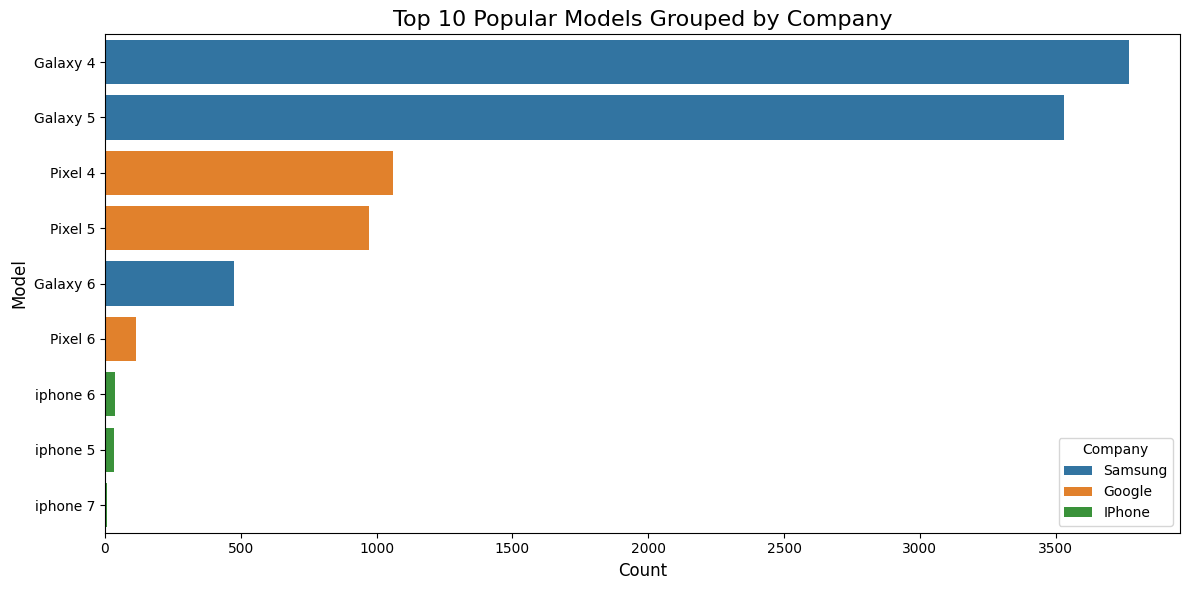

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('phones_data_cleaned.csv')

# Group by company and model, and calculate counts
top_models = data.groupby(['company', 'model']).size().reset_index(name='count')
top_models = top_models.sort_values('count', ascending=False).head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='model', hue='company', data=top_models, palette='tab10')
plt.title('Top 10 Popular Models Grouped by Company', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend(title='Company', loc='lower right')
plt.tight_layout()
plt.show()


2. Relationship Between Price and User Ratings: Scatter Plot

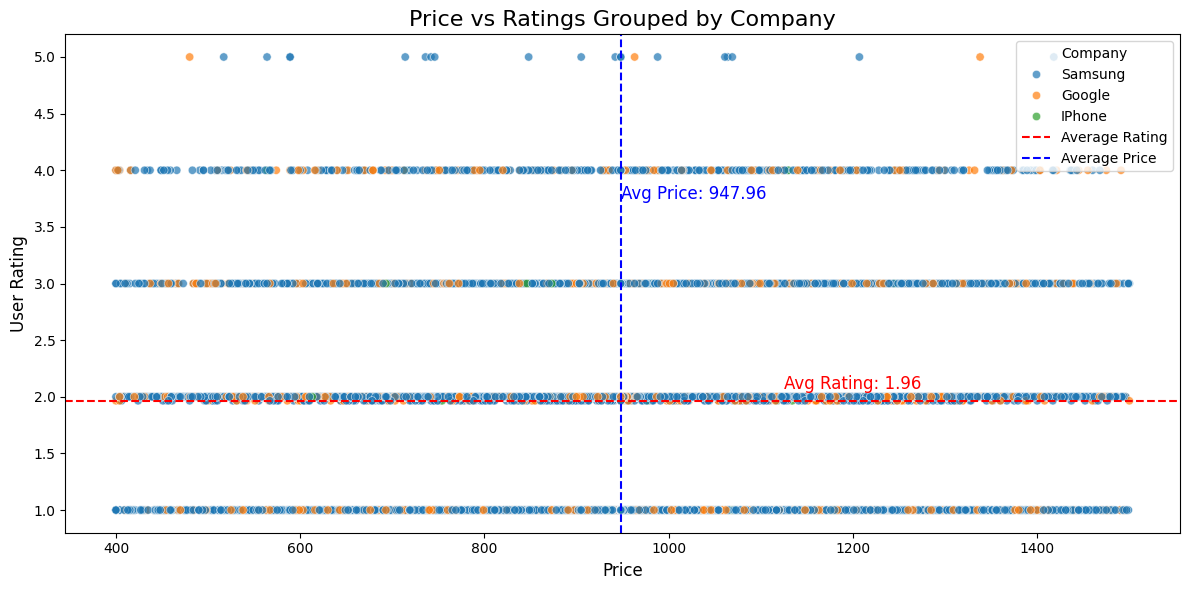

In [43]:
# Calculate average price and average rating
avg_rating = data['rating'].mean()
avg_price = data['price'].mean()

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='price', 
    y='rating', 
    hue='company', 
    data=data, 
    palette='tab10', 
    alpha=0.7
)
plt.title('Price vs Ratings Grouped by Company', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('User Rating', fontsize=12)
plt.axhline(y=avg_rating, color='red', linestyle='--', label='Average Rating')
plt.axvline(x=avg_price, color='blue', linestyle='--', label='Average Price')

# Annotate average rating and price values
plt.text(
    data['price'].max() * 0.75, avg_rating + 0.1, f'Avg Rating: {avg_rating:.2f}', 
    color='red', fontsize=12
)
plt.text(
    avg_price + 0.1, data['rating'].max() * 0.75, f'Avg Price: {avg_price:.2f}', 
    color='blue', fontsize=12
)

plt.legend(title='Company', loc='upper right')
plt.tight_layout()
plt.show()



3. Battery Health Variation by Model: Boxplot

C:\Users\moreg\AppData\Local\Temp\ipykernel_6352\1129036826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='battery_health', data=data, palette='Set2')


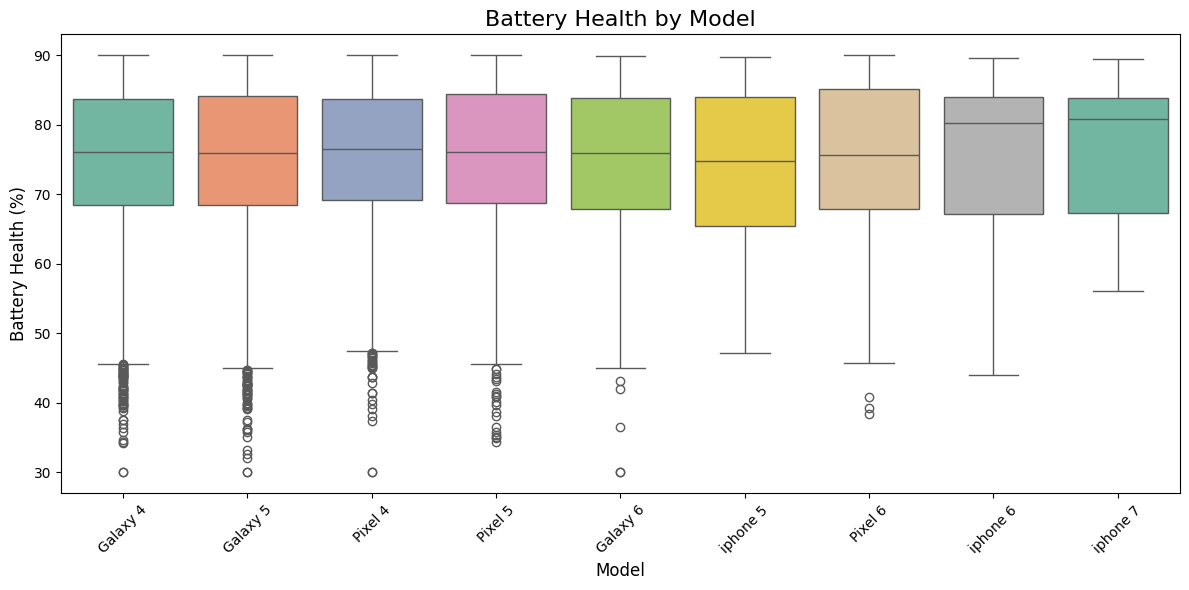

In [44]:
# Create boxplot for battery health by model
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='battery_health', data=data, palette='Set2')
plt.title('Battery Health by Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Battery Health (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.tight_layout()
plt.show()



4. Price Distribution frequency: Histograms

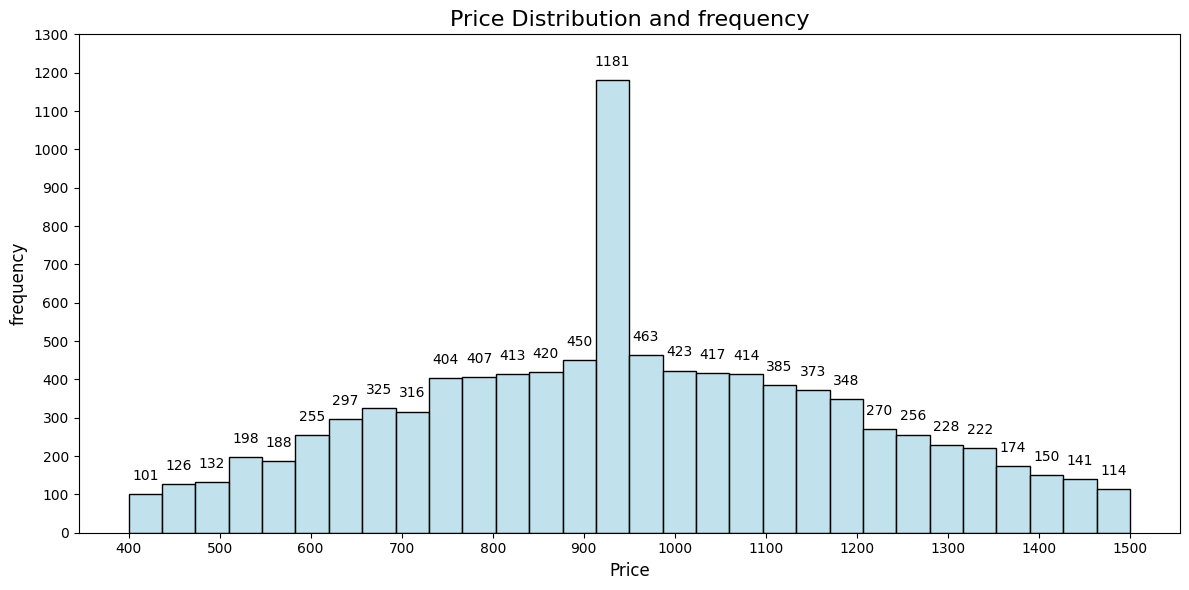

In [53]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=data, x='price', kde=False, bins=30, color='lightblue')

# Set x and y axis ticks to multiples of 100, starting from 400 for x-axis
plt.xticks(range(400, int(data['price'].max()) + 100, 100))  # x-axis starts from 400 and goes in steps of 100
plt.yticks(range(0, int(plt.gca().get_ylim()[1]) + 100, 100))  # y-axis from 0 to max frequency in steps of 100

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                xytext=(0, 8), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

plt.title('Price Distribution and frequency', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.tight_layout()
plt.show()



5. Average ratings by Phone model: Bar Chart 

C:\Users\moreg\AppData\Local\Temp\ipykernel_6352\2689922291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_model.index, y=average_rating_by_model.values, palette='muted')


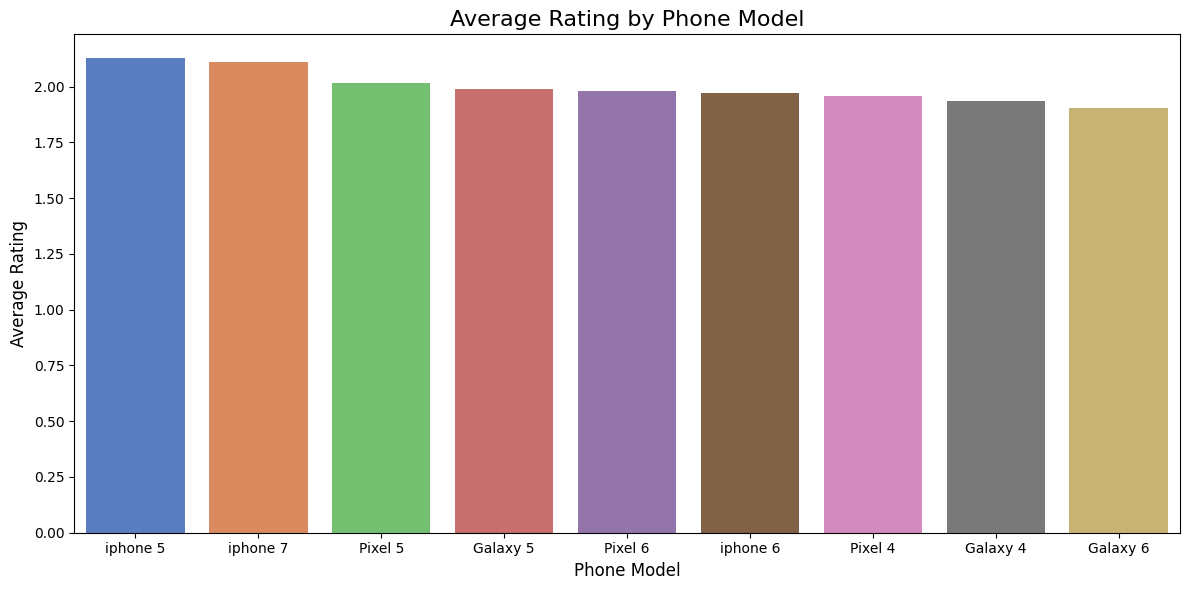

In [ ]:

# Group by model and calculate the average rating for each model
average_rating_by_model = data.groupby('model')['rating'].mean().sort_values(ascending=False)

# Create a bar chart for average rating by model
plt.figure(figsize=(12, 6))
sns.barplot(x=average_rating_by_model.index, y=average_rating_by_model.values, palette='muted')
plt.title('Average Rating by Phone Model', fontsize=16)
plt.xlabel('Phone Model', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()


6. Market Share of Companies Based on Phone Count: Pie Chart

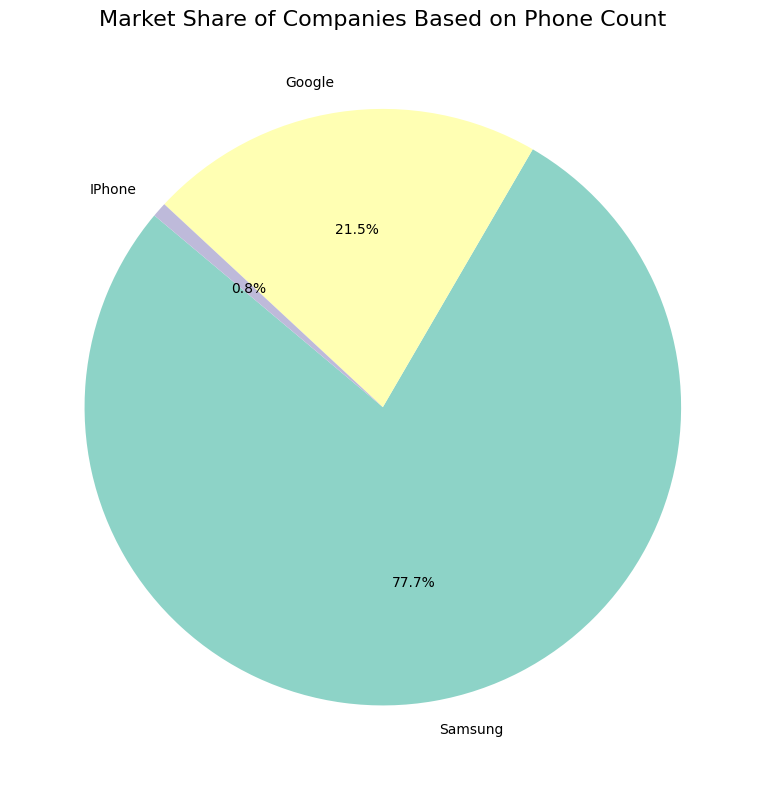

In [47]:
# Pie Chart
# Count the occurrences of each company in the dataset
market_share = data['company'].value_counts()

# Create a pie chart for the market share of companies
plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=140)
plt.title('Market Share of Companies Based on Phone Count', fontsize=16)
plt.tight_layout()
plt.show()


7. Average Price of Phones by Company Over Time: Line Plot

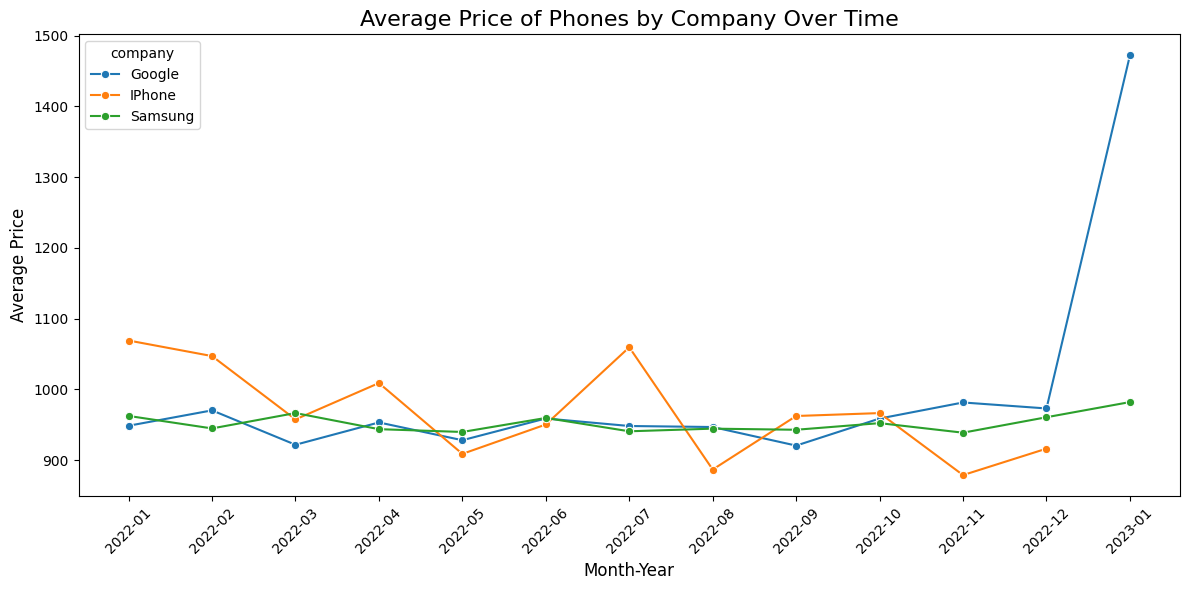

In [48]:
# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['month_year'] = data['date'].dt.to_period('M')

# Drop rows with invalid dates
data = data.dropna(subset=['month_year'])

# Group by month_year and company, calculate the average price for each group
avg_price_by_company = data.groupby(['month_year', 'company'])['price'].mean().reset_index(name='avg_price')

# Ensure 'month_year' is in string format for plotting
avg_price_by_company['month_year'] = avg_price_by_company['month_year'].astype(str)

# Line plot for average price by company over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='avg_price', hue='company', data=avg_price_by_company, marker='o', palette='tab10')
plt.title('Average Price of Phones by Company Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


8. Average Battery Health by Price Range and Company: Heat Map

C:\Users\moreg\AppData\Local\Temp\ipykernel_6352\20305960.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(values='battery_health', index='price_range', columns='company', aggfunc='mean')


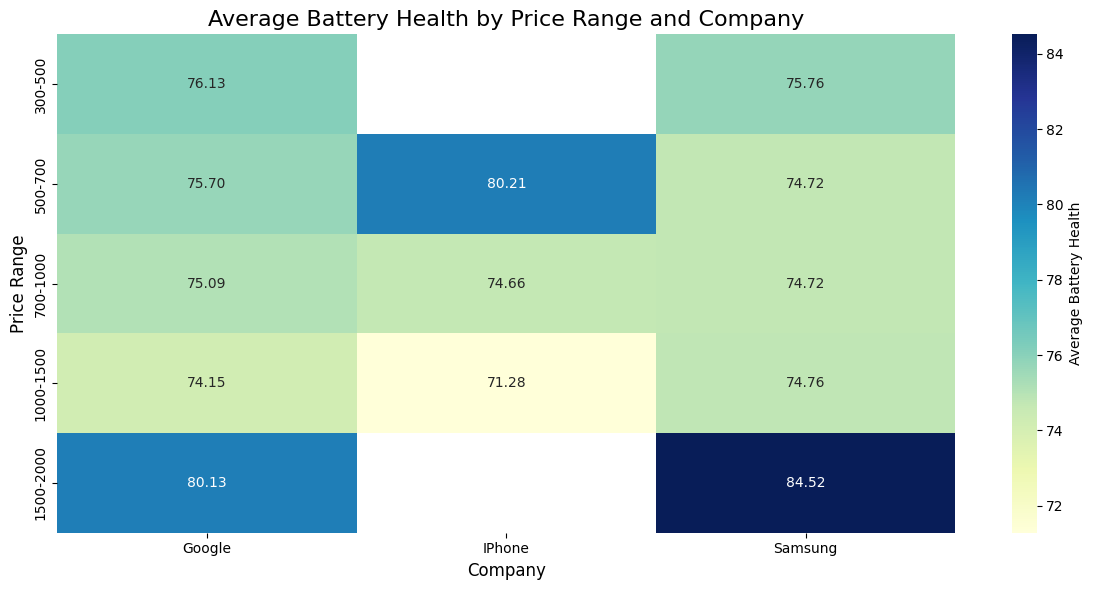

In [49]:
# Create price ranges (bins)
bins = [0, 100, 300, 500, 700, 1000, 1500, 2000]
labels = ['<100', '100-300', '300-500', '500-700', '700-1000', '1000-1500', '1500-2000']

# Create a new column for price range
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)

# Create a pivot table for battery health vs price range vs company
heatmap_data = data.pivot_table(values='battery_health', index='price_range', columns='company', aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Battery Health'})
plt.title('Average Battery Health by Price Range and Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price Range', fontsize=12)
plt.tight_layout()
plt.show()
